In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
Stock = pd.read_csv('data/AAPL.csv')
df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.set_index('Date', inplace=True)

In [3]:
print(df_Stock.head())


            Open  High   Low  Close     Volume      SD20  Upper_Band  \
Date                                                                   
2005-10-17  6.66  6.69  6.50   6.60  154208600  0.169237    6.827473   
2005-10-18  6.57  6.66  6.44   6.45  152397000  0.168339    6.819677   
2005-10-19  6.43  6.78  6.32   6.78  252170800  0.180306    6.861112   
2005-10-20  6.72  6.97  6.71   6.93  339440500  0.202674    6.931847   
2005-10-21  7.02  7.03  6.83   6.87  199181500  0.216680    6.974860   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2005-10-17    6.150527          6.67          6.63  ...    33.692   33.9970   
2005-10-18    6.146323          6.60          6.67  ...    33.570   33.9525   
2005-10-19    6.139888          6.45          6.60  ...    33.562   33.9600   
2005-10-20    6.121153          6.78          6.45  ...    33.567   33.9455   
2005-10-21    6.10814

In [4]:
print(df_Stock.tail(5))

              Open    High     Low   Close    Volume       SD20  Upper_Band  \
Date                                                                          
2020-08-07  452.82  454.70  441.17  444.45  49453300  27.954399  455.316298   
2020-08-10  450.40  455.10  440.00  450.91  53100900  29.847338  462.586675   
2020-08-11  447.88  449.93  436.43  437.50  46975600  30.576290  466.543079   
2020-08-12  441.99  453.10  441.19  452.04  41486200  32.050532  472.583564   
2020-08-13  457.72  464.17  455.71  460.04  52520500  33.532634  479.279768   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2020-08-07  343.498702        454.79        439.46  ...   266.054  263.4085   
2020-08-10  343.197325        444.45        454.79  ...   267.073  263.9970   
2020-08-11  344.237921        450.91        444.45  ...   267.911  264.2380   
2020-08-12  344.381436        437.50        450.91 

In [5]:
print(df_Stock.shape)
print(df_Stock.columns)

(3732, 63)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')


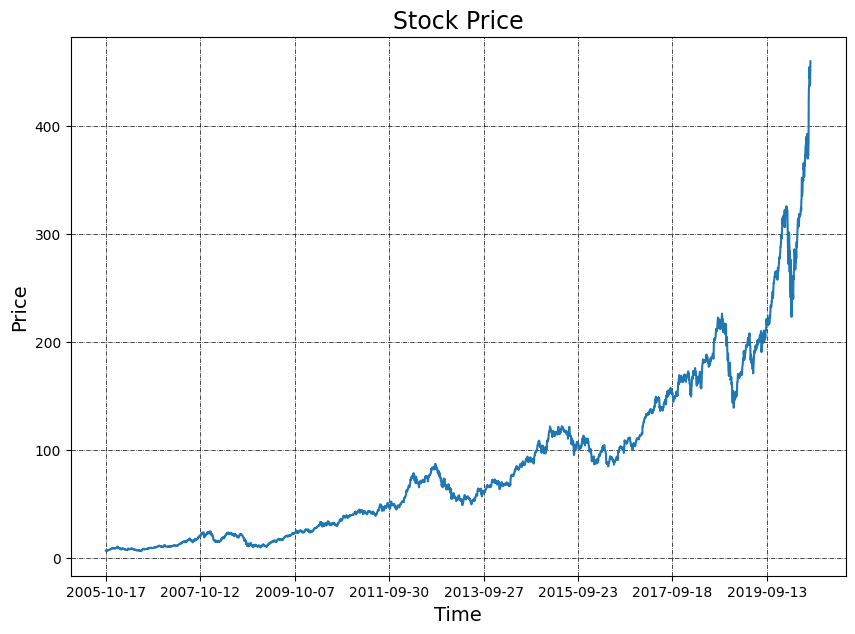

In [6]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
df_Stock = df_Stock.drop(columns='Date_col')

In [7]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.83)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.07)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test


In [8]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)


Historical Stock Data length is -  3732
Training Set length -  3097
Validation Set length -  373
Test Set length -  261
(3097, 61) (373, 61) (262, 61)
(3097,) (373,) (262,)


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-7.63618352e-02  2.81750113e-01  1.65837710e-01  4.90169934e-01
 -2.46362853e-10  1.61054971e-03  6.93876785e-02  6.29454655e-02
 -3.30819766e-01 -2.45801227e-02  2.81403575e-02 -3.59563537e-02
 -3.93511862e-04 -3.76221220e-01 -7.92575732e-02  6.61665680e-02
  5.13870471e-02 -9.30221796e-03  1.41625559e-01  1.41625559e-01
  1.41625559e-01  1.41625559e-01  1.41625559e-01  1.28338568e+00
 -8.96440244e-01 -1.03418479e-01  1.63628255e-04 -1.85132586e-10
 -3.45391335e-03  6.44539129e-03  5.11359707e-04  5.11359580e-04
  1.40268070e+00 -2.26716201e-10  1.02379216e-11  1.99236844e-02
  2.18412379e-02 -2.06078262e-02  6.91074780e-03  1.49984049e-02
 -6.98114510e-02 -5.27137232e-02  1.33831554e-01  4.29411071e-01
  1.08246745e-14 -3.85135685e-02  6.06297799e-02  6.03085587e-01
 -2.80220211e-02  1.12173259e-02 -3.88930327e-02 -2.07853116e-02
  2.72972670e-02  2.82942908e-03  5.11888553e-02  1.17060962e-02
 -1.08834014e-02 -1.52410487e-03 -1.42138673e-03  1.39201626e-03
  1.32

In [11]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994111197571195


In [12]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [14]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.46
Training Mean Squared Error: 1.11
Training RMSE:  1.05
Training MAE:  0.67
 


In [15]:
print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

Validation R-squared:  0.97
Validation Explained Variation:  0.97
Validation MAPE: 1.29
Validation Mean Squared Error: 1.11
Validation RMSE:  3.26
Validation MAE:  2.34
 


In [16]:
print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Test R-squared:  0.98
Test Explained Variation:  0.98
Test MAPE: 1.83
Test Mean Squared Error: 61.5
Test RMSE:  7.84
Test MAE:  5.28


In [17]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2018-02-06 00:00:00,153.79,157.123024
1,2018-02-07 00:00:00,149.56,153.669335
2,2018-02-08 00:00:00,151.39,150.713695
3,2018-02-09 00:00:00,157.49,151.549744
4,2018-02-12 00:00:00,159.07,158.031665
...,...,...,...
368,2019-07-25 00:00:00,204.92,204.158295
369,2019-07-26 00:00:00,206.83,205.438600
370,2019-07-29 00:00:00,205.95,206.717250
371,2019-07-30 00:00:00,210.15,205.327520


<Axes: >

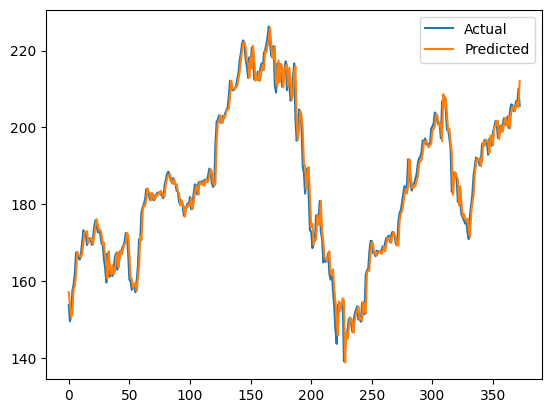

In [18]:
df_pred[['Actual', 'Predicted']].plot()